## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout  # type: ignore
from scikeras.wrappers import KerasClassifier # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore

## Data Preprocessing

In [6]:
data_dir = "data/imgs"

# Data Augmentation para treinamento e normalização para todos os dados
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.15)  # Dividindo validação

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)  # Dividindo teste

# Dividindo os dados em treino, validação e teste
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Gerador para o conjunto de teste
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 18433 images belonging to 10 classes.
Found 3246 images belonging to 10 classes.
Found 3246 images belonging to 10 classes.


## CNN model

### Model creation

In [23]:

def create_model(
    optimizer='adam',
    activation='relu',
    dense_units=256,
):
    model = Sequential()

    # 3 camadas de convolução
    model.add(Conv2D(32, (3, 3), activation=activation,
              input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    # 1 camada densa
    model.add(Dense(dense_units, activation='relu'))

    # Dropout para evitar overfitting
    model.add(Dropout(0.5))

    # Camada de saída
    model.add(Dense(2, activation='softmax'))

    # Compilando o modelo
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### Model training

In [8]:
# Treinamento do modelo
model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 1265s 2s/step - accuracy: 0.3367 - loss: 1.8307 - val_accuracy: 0.6600 - val_loss: 1.0501
Epoch 2/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.5938 - loss: 1.1759 - val_accuracy: 0.8571 - val_loss: 0.5161
Epoch 3/10


2024-10-05 01:05:52.107745: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-05 01:05:52.163659: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


576/576 ━━━━━━━━━━━━━━━━━━━━ 1114s 2s/step - accuracy: 0.6693 - loss: 0.9340 - val_accuracy: 0.7317 - val_loss: 0.7735
Epoch 4/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step - accuracy: 0.7188 - loss: 0.8537 - val_accuracy: 0.7857 - val_loss: 0.6024
Epoch 5/10


2024-10-05 01:24:26.365160: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


576/576 ━━━━━━━━━━━━━━━━━━━━ 275s 475ms/step - accuracy: 0.7440 - loss: 0.7527 - val_accuracy: 0.8165 - val_loss: 0.5883
Epoch 6/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.6875 - loss: 0.7463 - val_accuracy: 0.8571 - val_loss: 0.8587
Epoch 7/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 285s 493ms/step - accuracy: 0.7821 - loss: 0.6450 - val_accuracy: 0.8032 - val_loss: 0.6432
Epoch 8/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.7812 - loss: 0.5275 - val_accuracy: 0.8571 - val_loss: 0.3199
Epoch 9/10


2024-10-05 01:33:46.891615: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


576/576 ━━━━━━━━━━━━━━━━━━━━ 323s 558ms/step - accuracy: 0.8155 - loss: 0.5350 - val_accuracy: 0.8441 - val_loss: 0.5489
Epoch 10/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.7812 - loss: 0.5148 - val_accuracy: 0.9286 - val_loss: 0.2499


## Model Evaluation

In [9]:
# Avaliando no conjunto de teste
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step
Classification Report
                     precision    recall  f1-score   support

     Apple__Healthy       0.13      0.09      0.11       365
      Apple__Rotten       0.14      0.18      0.16       438
    Banana__Healthy       0.09      0.08      0.09       299
     Banana__Rotten       0.13      0.14      0.13       419
     Mango__Healthy       0.08      0.09      0.09       271
      Mango__Rotten       0.14      0.15      0.14       337
    Orange__Healthy       0.10      0.10      0.10       311
     Orange__Rotten       0.13      0.12      0.12       327
Strawberry__Healthy       0.06      0.06      0.06       240
 Strawberry__Rotten       0.08      0.08      0.08       239

           accuracy                           0.11      3246
          macro avg       0.11      0.11      0.11      3246
       weighted avg       0.11      0.11      0.11      3246



In [10]:
def plot_results(loss_values, ylabel, ylim, metric_names, colors):
    plt.figure(figsize=(10, 6))
    for i in range(len(loss_values)):
        plt.plot(loss_values[i], color=colors[i], label=metric_names[i])
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

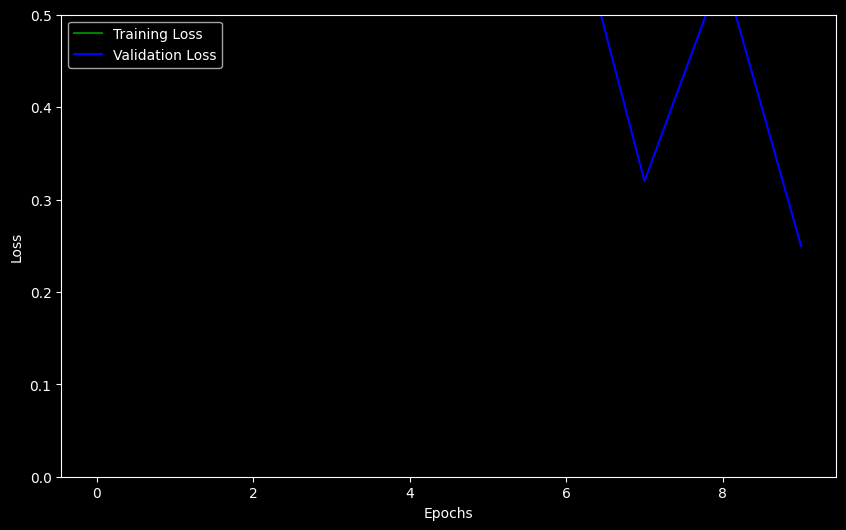

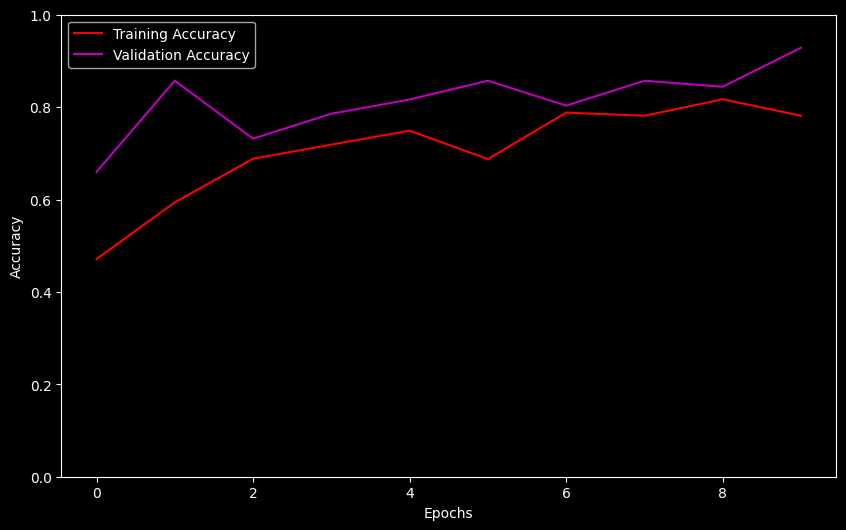

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_results(
    [train_loss, val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [train_acc, val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

### Matriz de confusão

102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step


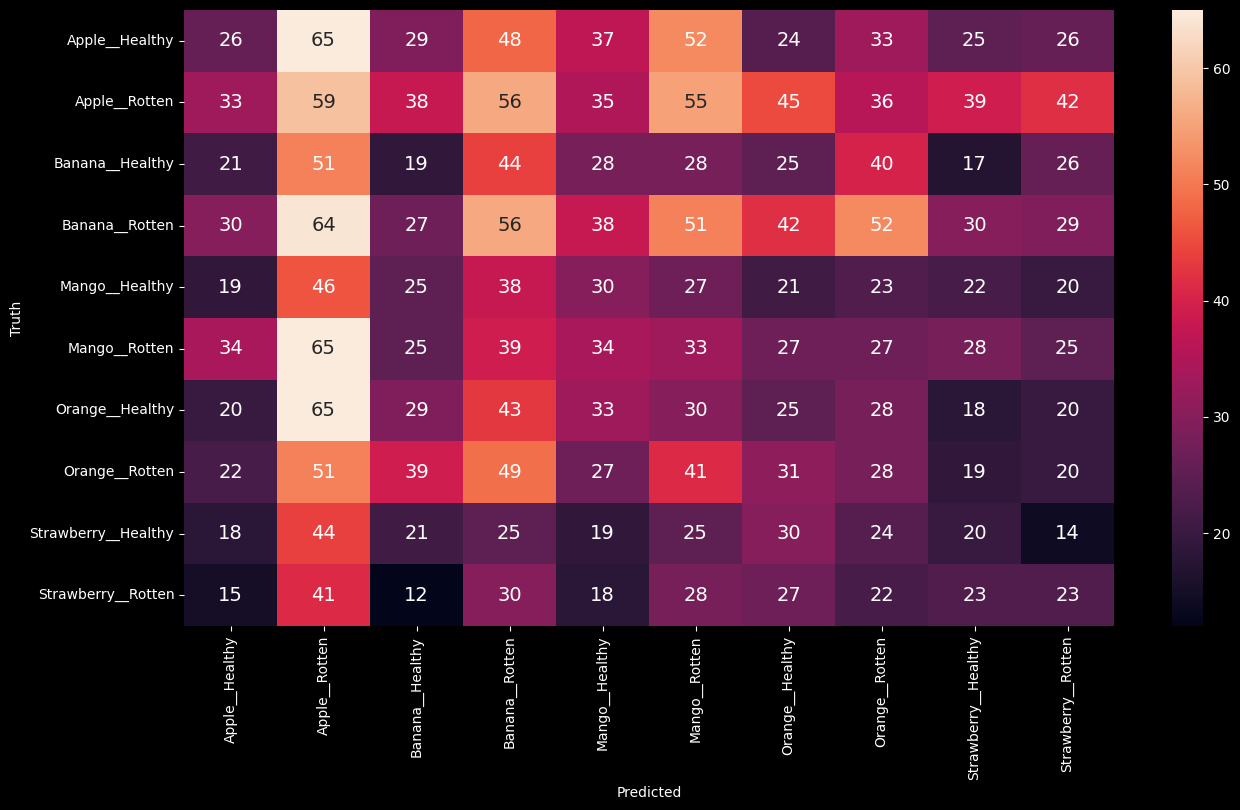

In [15]:
predictions = model.predict(test_generator)
predicted_labels = [np.argmax(i) for i in predictions]

# Ensure y_true is a 1-dimensional array of integer labels
y_test_integer_labels = y_true

cm = tf.math.confusion_matrix(
    labels=y_test_integer_labels,
    predictions=predicted_labels
)

# matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14},
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Grid Search

In [ ]:
params_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'dense_units': [256, 512],
}

# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Grid Search
kc = KerasClassifier(build_fn=create_model, epochs=10,
                     batch_size=32, verbose=1, activation='relu', dense_units=256)

grid = GridSearchCV(estimator=kc, param_grid=params_grid, n_jobs=1, cv=3)  # Set n_jobs=1 to avoid PicklingError

grid_result = grid.fit(
    train_generator,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

# Melhores parâmetros
print('Best Parameters')
print(grid_result.best_params_)

# Melhor acurácia
print('Best Accuracy')
print(grid_result.best_score_)

### Melhor modelo

In [ ]:
best_model = grid_result.best_estimator_.model

best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=grid_result.best_params_['epochs'],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# # treinando o melhor modelo
# best_model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // 32
# )

# Avaliando no conjunto de teste
y_pred = best_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


best_model_train_loss = best_model.history.history['loss']
best_model_val_loss = best_model.history.history['val_loss']
best_model_train_acc = best_model.history.history['accuracy']
best_model_val_acc = best_model.history.history['val_accuracy']

plot_results(
    [best_model_train_loss, best_model_val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [best_model_train_acc, best_model_val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

In [ ]:
# matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## Pre-trained models

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3  # type: ignore

### VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

vgg16_model = Sequential([
    vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

vgg16_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Avaliando no conjunto de teste
y_pred = vgg16_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


vgg16_train_loss = vgg16_model.history.history['loss']
vgg16_val_loss = vgg16_model.history.history['val_loss']
vgg16_train_acc = vgg16_model.history.history['accuracy']
vgg16_val_acc = vgg16_model.history.history['val_accuracy']

plot_results(
    [vgg16_train_loss, vgg16_val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [vgg16_train_acc, vgg16_val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

In [ ]:
# plotando matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### ResNet50

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

resnet_model = Sequential([
    resnet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Avaliando no conjunto de teste
y_pred = resnet_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


resnet_train_loss = resnet_model.history.history['loss']
resnet_val_loss = resnet_model.history.history['val_loss']
resnet_train_acc = resnet_model.history.history['accuracy']
resnet_val_acc = resnet_model.history.history['val_accuracy']

plot_results(
    [resnet_train_loss, resnet_val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [resnet_train_acc, resnet_val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

In [ ]:
# matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### InceptionV3

In [ ]:
inception = InceptionV3(
    weights='imagenet', include_top=False, input_shape=(150, 150, 3))

inception_model = Sequential([
    inception,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

inception_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

inception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Avaliando no conjunto de teste
y_pred = inception_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


inception_train_loss = inception_model.history.history['loss']
inception_val_loss = inception_model.history.history['val_loss']
inception_train_acc = inception_model.history.history['accuracy']
inception_val_acc = inception_model.history.history['val_accuracy']

plot_results(
    [inception_train_loss, inception_val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [inception_train_acc, inception_val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

In [ ]:
# matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()